In [1]:
import pandas as pd
import pymysql
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings("ignore")
plt.style.use ('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 7.5
plt.rcParams['axes.unicode_minus'] = False

In [2]:
username = "*****"
password = "*****!"
hostname = "ec2-15-152-211-160.ap-northeast-3.compute.amazonaws.com"
database_name = "Data_Warehouse"

engine = create_engine(
    "mysql+pymysql://{user}:{pw}@{host}/{db}".format(
        user=username, pw=password, db=database_name, host=hostname
    )
)

investment_data_temp = pd.read_sql("SELECT * FROM investment_data_temp", con=engine)
engine.dispose()

In [27]:
investment_data_temp.head()

,corp,stock_code,sector,year,gross_profit_margin,operating_profit_margin,net_profit_margin,ebitda_margin,return_on_equity,return_on_assets,...,total_assets,fixed_assets,total_liabilities,total_equity,total_asset_turnover,net_working_capital_turnover,fixed_asset_turnover,accounts_receivable_turnover,inventory_turnover,accounts_payable_turnover
0,AJ네트웍스,095570,서비스업,2018,-2.031135,100.0,3.564602,-4.725704,7.577926,1.447255,...,2.575139e+12,3.245373e+11,2.083331e+12,4.918080e+11,0.406008,-2.577113,3.221590,12.929633,20.731210,27.150479
1,AJ네트웍스,095570,서비스업,2019,1.564526,100.0,4.211767,10.702041,12.128881,2.336252,...,1.803255e+12,3.566849e+11,1.455914e+12,3.473412e+11,0.554697,-3.152774,2.804323,9.531223,16.793745,30.242796
2,AJ네트웍스,095570,서비스업,2020,2.418601,100.0,-0.380388,-2.122140,-1.151640,-0.208845,...,1.588170e+12,2.712955e+11,1.300163e+12,2.880078e+11,0.549032,-2.113295,3.214045,10.262257,25.274770,21.776844
3,AJ네트웍스,095570,서비스업,2021,4.895548,100.0,7.814789,2.270003,21.168275,5.663071,...,1.355044e+12,2.056266e+11,9.925344e+11,3.625101e+11,0.724661,-3.908034,4.775393,10.530096,47.319072,21.688872
4,AJ네트웍스,095570,서비스업,2022,6.243745,100.0,0.725734,2.287604,2.423287,0.591958,...,1.481445e+12,1.922561e+11,1.119560e+12,3.618858e+11,0.815668,-2.355973,6.285199,12.724734,45.272012,20.482991


In [3]:
# 피쳐별 극단값 3개씩(0.001%) 제거

columns_to_process = investment_data_temp.columns[4:]
processed_data = investment_data_temp.iloc[:, :4].copy()

for column in columns_to_process:
    sorted_column = investment_data_temp[column].sort_values()
    processed_column = sorted_column.iloc[3:-3]
    processed_data[column] = processed_column

processed_data.dropna(inplace=True)
processed_data.head()

,corp,stock_code,sector,year,gross_profit_margin,operating_profit_margin,net_profit_margin,ebitda_margin,return_on_equity,return_on_assets,...,total_assets,fixed_assets,total_liabilities,total_equity,total_asset_turnover,net_working_capital_turnover,fixed_asset_turnover,accounts_receivable_turnover,inventory_turnover,accounts_payable_turnover
1,AJ네트웍스,095570,서비스업,2019,1.564526,100.000000,4.211767,10.702041,12.128881,2.336252,...,1.803255e+12,3.566849e+11,1.455914e+12,3.473412e+11,0.554697,-3.152774,2.804323,9.531223,16.793745,30.242796
2,AJ네트웍스,095570,서비스업,2020,2.418601,100.000000,-0.380388,-2.122140,-1.151640,-0.208845,...,1.588170e+12,2.712955e+11,1.300163e+12,2.880078e+11,0.549032,-2.113295,3.214045,10.262257,25.274770,21.776844
3,AJ네트웍스,095570,서비스업,2021,4.895548,100.000000,7.814789,2.270003,21.168275,5.663071,...,1.355044e+12,2.056266e+11,9.925344e+11,3.625101e+11,0.724661,-3.908034,4.775393,10.530096,47.319072,21.688872
4,AJ네트웍스,095570,서비스업,2022,6.243745,100.000000,0.725734,2.287604,2.423287,0.591958,...,1.481445e+12,1.922561e+11,1.119560e+12,3.618858e+11,0.815668,-2.355973,6.285199,12.724734,45.272012,20.482991
5,AK홀딩스,006840,기타금융,2018,28.174701,7.267707,5.567508,7.269978,14.018640,6.080770,...,3.397931e+12,1.586871e+12,1.924034e+12,1.473898e+12,1.092189,-152.534487,2.338680,13.804193,11.741044,8.127605


In [32]:
print(f"원본 데이터 shape: {investment_data_temp.shape}")
print(f"극단치 제거후 데이터 shape: {processed_data.shape}")

원본 데이터 shape: (3097, 40)
극단치 제거후 데이터 shape: (2973, 40)


In [44]:
print(processed_data.info())
print(processed_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 2973 entries, 1 to 3096
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   corp                          2973 non-null   object 
 1   stock_code                    2973 non-null   object 
 2   sector                        2973 non-null   object 
 3   year                          2973 non-null   object 
 4   gross_profit_margin           2973 non-null   float64
 5   operating_profit_margin       2973 non-null   float64
 6   net_profit_margin             2973 non-null   float64
 7   ebitda_margin                 2973 non-null   float64
 8   return_on_equity              2973 non-null   float64
 9   return_on_assets              2973 non-null   float64
 10  return_on_invested_capital    2973 non-null   float64
 11  debt_ratio                    2973 non-null   float64
 12  current_ratio                 2973 non-null   float64
 13  quick_ra

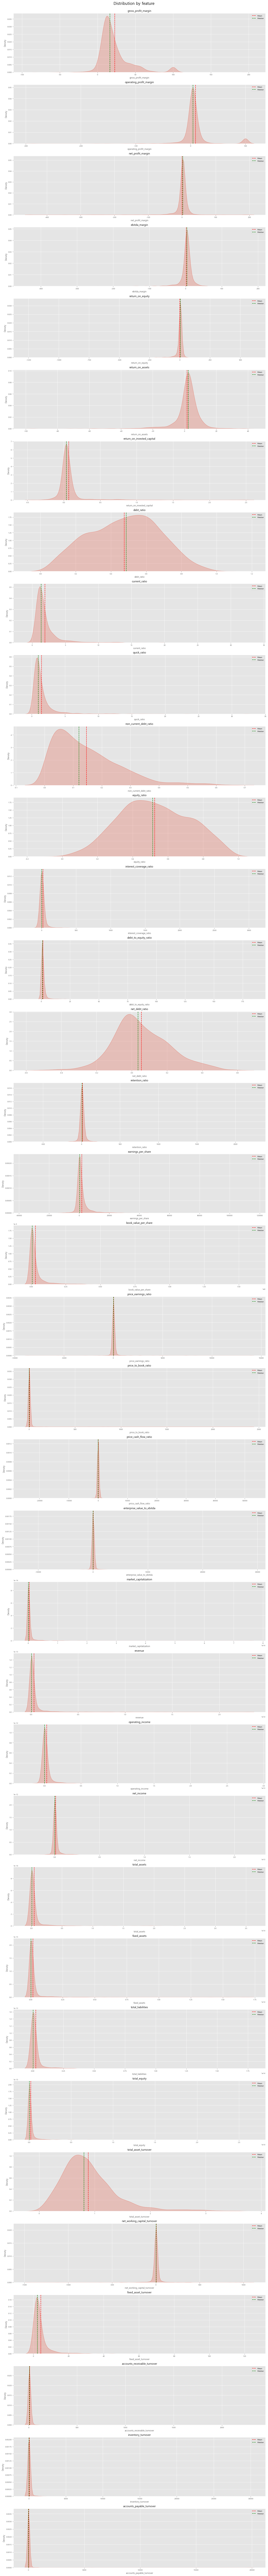

In [39]:
# 칼럼별 분포 확인
columns_to_plot = processed_data.columns[4:]

num_rows = len(columns_to_plot)

fig, axes = plt.subplots(nrows=num_rows, figsize=(15, 4*num_rows))
fig.suptitle('Distribution by feature', y=1, fontsize=16)

for i, column in enumerate(columns_to_plot):
    sns.kdeplot(processed_data[column], fill=True, ax=axes[i])

    mean_value = processed_data[column].mean()
    median_value = processed_data[column].median()

    axes[i].axvline(mean_value, color='r', linestyle='--', label='Mean')
    axes[i].axvline(median_value, color='g', linestyle='--', label='Median')

    axes[i].set_title(column)

    axes[i].legend()

plt.tight_layout()

plt.show()

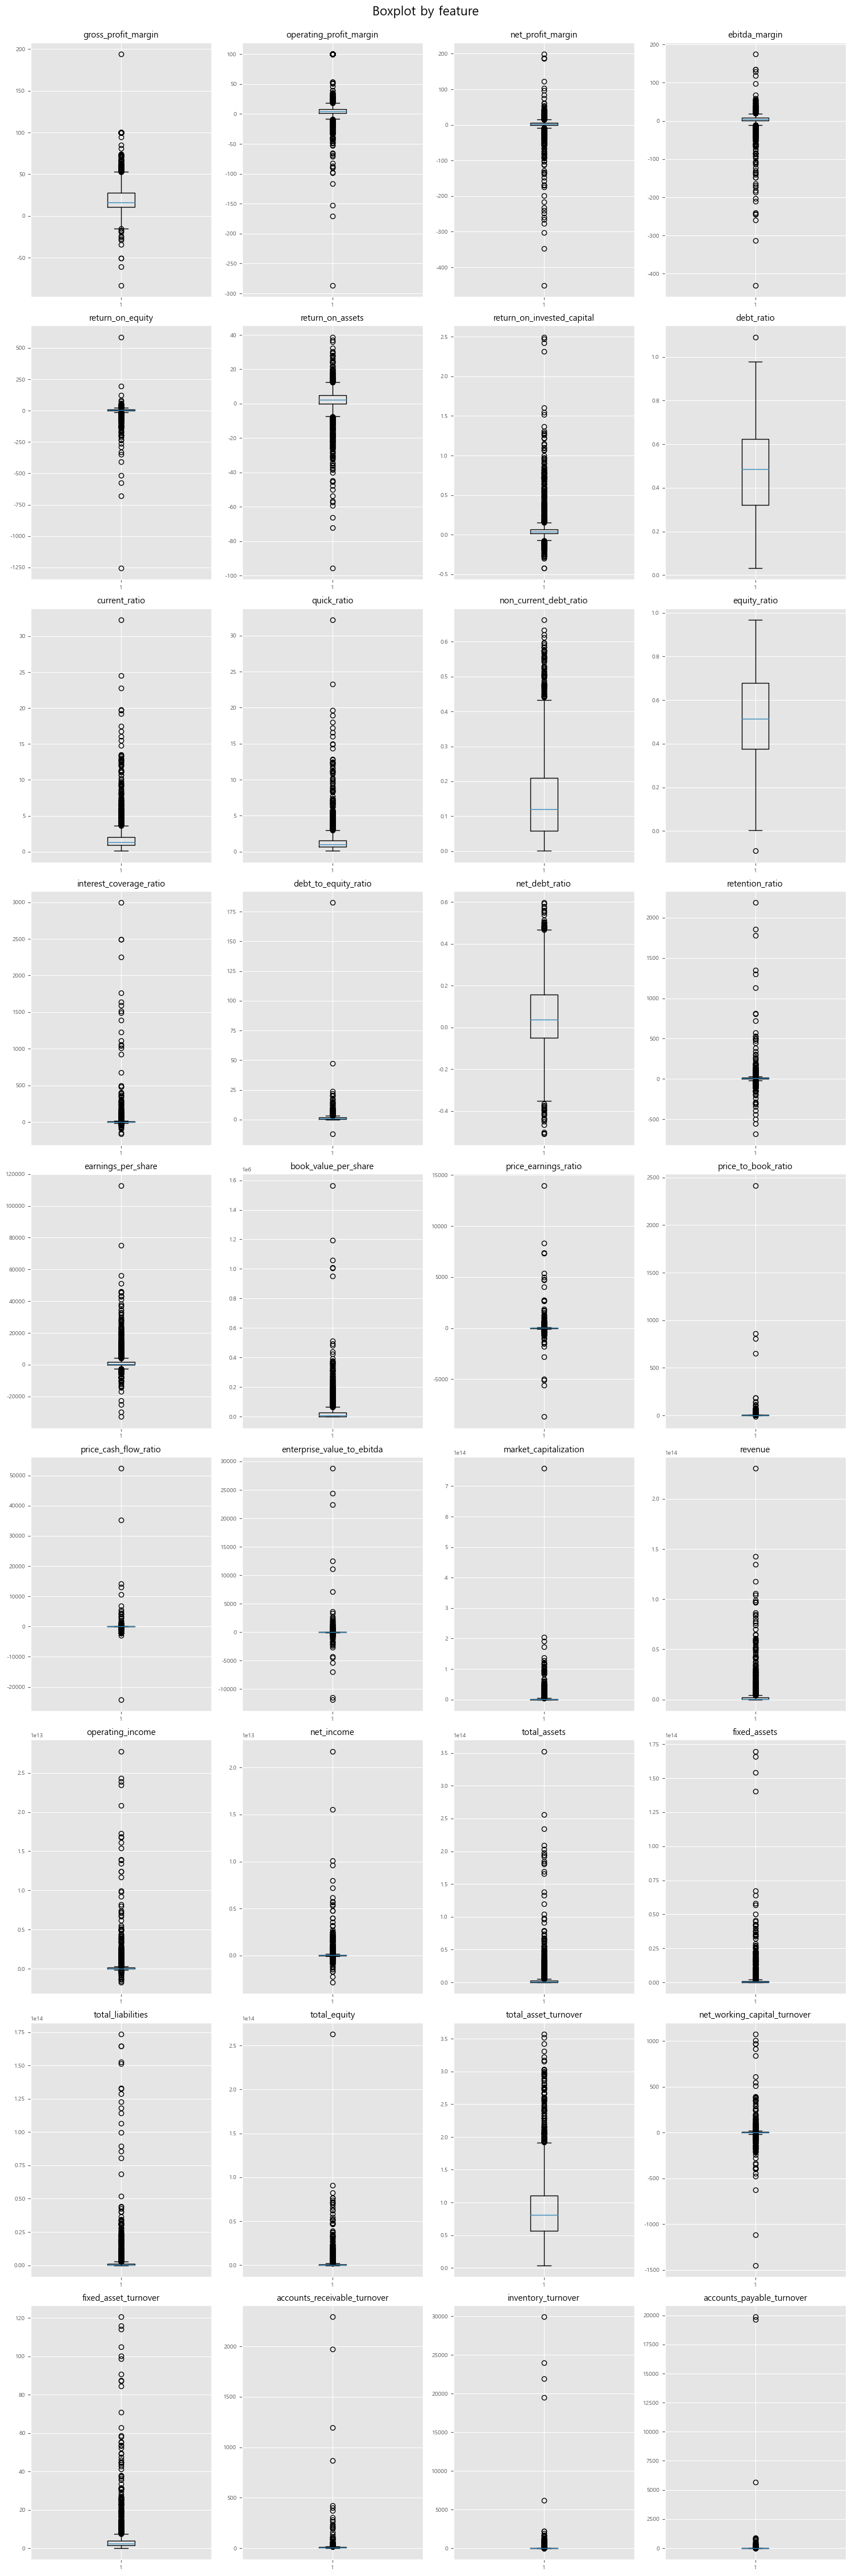

In [38]:
# 칼럼별 박스 플랏 확인
num_columns = 4
num_rows = (len(processed_data.columns) - 4) // num_columns + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5*num_rows))

axes = axes.flatten()

for i, column in enumerate(processed_data.columns[4:]):
    axes[i].boxplot(processed_data[column])
    axes[i].set_title(column)
    
fig.suptitle('Boxplot by feature', y=1, fontsize=16)

for j in range(len(processed_data.columns[4:]), num_rows * num_columns):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

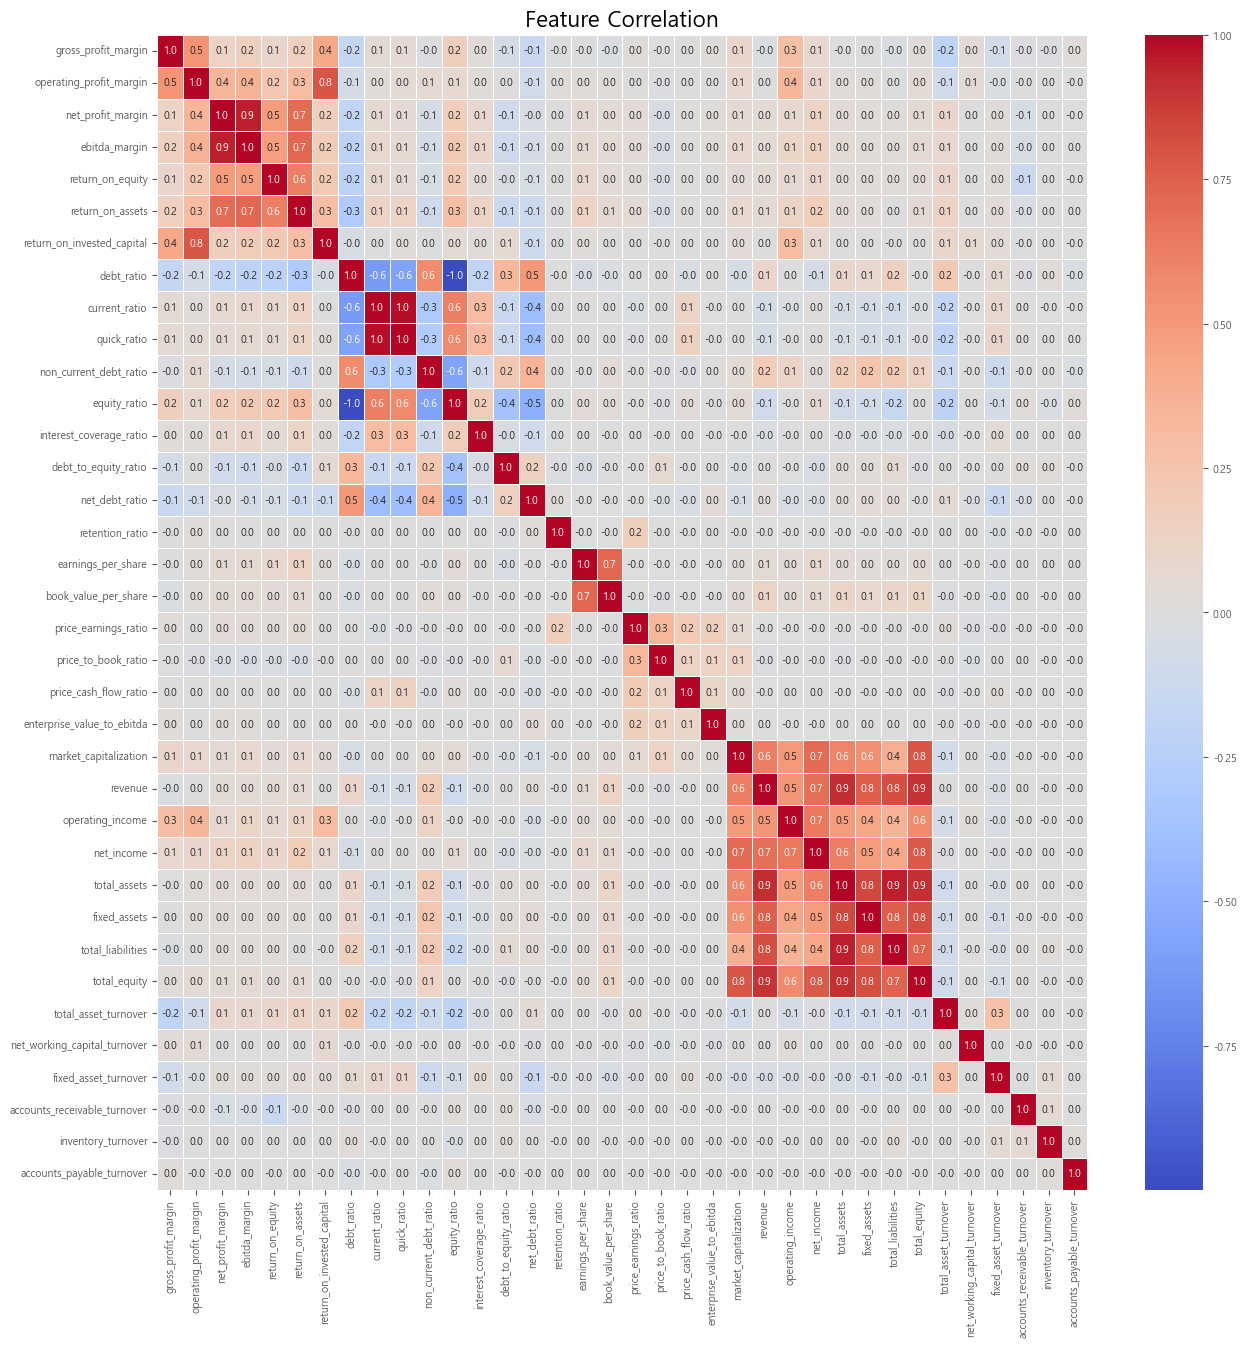

In [4]:
# 상관관계 확인
columns_to_correlate = processed_data.columns[4:]
subset_df = processed_data[columns_to_correlate]

f, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(subset_df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap='coolwarm')
heatmap.set_title('Feature Correlation', fontsize=16)
plt.show()